In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import seaborn as sns
import apikeys
import json
import requests as req
import numpy as np
import matplotlib.pyplot as plt
import re
from tracklist import track_list
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import plotly
import plotly.figure_factory as ff
import plotly.plotly as py
import plotly.graph_objs as go

In [215]:
# Initialize Sentiment Analyzer

#tracks_sample_list = [{"artist": "Lady Gaga", "title": "Bad Romance", "genre": "pop"}]

#Dicts to collect API data
# for track in track_list:
#         url = "https://api.musixmatch.com/ws/1.1/matcher.lyrics.get?format=json&q_track=" + track['artist'] + "&q_artist=" + track['title'] + '&apikey=2ad42aad9e1f1628b2418c17e486f84b'
#         response_json = req.get(url).json()
#         try:
#                 lyrics = response_json['message']['body']['lyrics']['lyrics_body'].replace("\n", ' ')
#                 lyrics = lyrics.replace("******* This Lyrics is NOT for Commercial use *******", '')
#                 track.update({'lyrics': lyrics})
#         except:
#                 print (track, response_json)

# with open('tracks_lyrics.json', 'w') as fout:
#     json.dump(track_list, fout)

In [216]:
song_df = pd.DataFrame(track_list)
song_df["word_total"]=song_df.lyrics.apply(lambda x: len(str(x).split(' ')))
song_df["unique_total"]=song_df.lyrics.apply(lambda x: len(set(str(x).split(' '))))
song_df=song_df.loc[(song_df['unique_total'] > 1)]
song_df.head()

,artist,genre,lyrics,title,word_total,unique_total
0,Real McCoy,pop,"Another night, another dream but always you It...",Another Night,151,65
1,Lifehouse,pop,Desperate for changing Starving for truth I'm ...,Hanging By A Moment,87,50
2,Nickelback,pop,Never made it as a wise man I couldn't cut it...,How You Remind Me,168,90
3,3 Doors Down,pop,A hundred days have made me older Since the la...,Here Without You,100,63
4,No Doubt,pop,You and me We used to be together Everyday tog...,Don't Speak,94,66


In [217]:
analyzer = SentimentIntensityAnalyzer()

In [218]:
compound=[]
pos=[]
neu=[]
neg=[]
for row in song_df['lyrics']:
    try:
        scores = analyzer.polarity_scores(row)
        compound.append(scores['compound'])
        pos.append(scores['pos'])
        neu.append(scores['neu'])
        neg.append(scores['neg'])
            # Add sentiments for each tweet into `sentiments` list
    except:
        next(row)
song_df["Compound"]=compound
song_df["Positive"]=pos
song_df["Negative"]=neu
song_df["Neutral"]=neg
song_df

,artist,genre,lyrics,title,word_total,unique_total,Compound,Positive,Negative,Neutral
0,Real McCoy,pop,"Another night, another dream but always you It...",Another Night,151,65,0.9980,0.436,0.496,0.069
1,Lifehouse,pop,Desperate for changing Starving for truth I'm ...,Hanging By A Moment,87,50,0.7146,0.122,0.789,0.090
2,Nickelback,pop,Never made it as a wise man I couldn't cut it...,How You Remind Me,168,90,-0.1670,0.205,0.580,0.215
3,3 Doors Down,pop,A hundred days have made me older Since the la...,Here Without You,100,63,0.4404,0.101,0.828,0.072
4,No Doubt,pop,You and me We used to be together Everyday tog...,Don't Speak,94,66,0.6114,0.162,0.716,0.123
5,Goo Goo Dolls,pop,And I'd give up forever to touch you 'Cause I ...,Iris,86,53,0.4728,0.061,0.893,0.047
6,Donna Lewis,pop,Feels like I'm standing in a timeless dream Of...,I Love You Always Forever,131,82,0.9701,0.190,0.794,0.017
7,Maroon 5,pop,You and I go hard at each other like we're goi...,One More Night,160,92,-0.6662,0.139,0.697,0.164
8,Avicii,pop,Feeling my way through the darkness Guided by ...,Wake Me Up!,94,63,0.6870,0.151,0.794,0.055
9,Ke$ha,pop,Wake up in the mornin' feeling like P. Diddy (...,TiK ToK,159,97,0.9513,0.164,0.792,0.044


In [234]:
song_df.to_csv('song_info.csv', index=False)
alt = song_df[(song_df['genre']=='alternative')]
pop = song_df[(song_df['genre']=='pop')]
country = song_df[(song_df['genre']=='country')]
hiphop = song_df[(song_df['genre']=='hip hop')]
rock = song_df[(song_df['genre']=='rock')]
hist_data = [alt['Compound'].tolist(), pop['Compound'].tolist(), country['Compound'].tolist(), hiphop['Compound'].tolist(), rock['Compound'].tolist()]
group_labels = ['Alternative', 'Pop', 'Country', 'Hip Hop', 'Rock']
fig = ff.create_distplot(hist_data, group_labels, show_curve=True, show_hist=False, bin_size=.2)
py.iplot(fig, filename='Genre Sentiment')


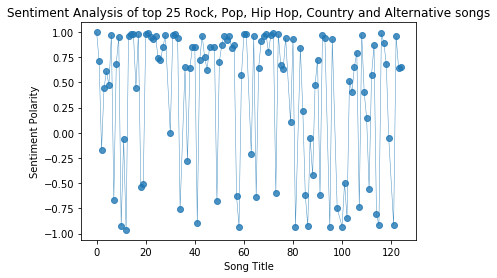

In [187]:
# Create plot
plt.plot(song_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Add title and labels
plt.title(f"Sentiment Analysis of top 25 Rock, Pop, Hip Hop, Country and Alternative songs")
plt.ylabel("Sentiment Polarity")
plt.xlabel("Song Title")
plt.show()

In [183]:
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

PlotlyError: Oops, this function was written to handle multiple datasets, if you want to plot just one, make sure your hist_data variable is still a list of lists, i.e. x = [1, 2, 3] -> x = [[1, 2, 3]]

In [164]:
fig = ff.create_distplot(song_df.groupby(['genre']), group_labels=(['genre']))

KeyError: 'Column not found: 0'